# PIKA: Prior Informatics Knowledge Assessment
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Prior Informatics Knowledge Assessment is a tool for assessing students’ programming knowledge and skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2025, designed to give preliminary findings of the test quickly. The (static) written report will be published sometime fall 2025 here: https://pika-test.org/

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats
from itertools import product
from collections import defaultdict

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [2]:
!python clean_data.py
!python grade_submissions.py

Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
11 submissions.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Max score: 78
Submissions graded.


### Dataset

In [3]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['uni_course'] == 'no')]

# Convert all years to integers
df['graduate_year'] = pd.to_numeric(df['graduate_year'], errors='coerce')

In [4]:
# Filter by Graduate Year
years = [2023, 2024, 2025]
#df = df[df['graduate_year'].isin(years)]

## Demographics

In [5]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 1 student submissions.


In [6]:
def plot_distribution(df, column_name, title="Distribution"):
    """
    Plots a bar chart showing the percentage frequency of individual courses
    from a column with comma-separated values.
    """
    # Replace '-' or empty strings with NaN
    course_series = df[column_name].replace('-', pd.NA).dropna()

    # Split comma-separated values and flatten the list
    course_series = course_series.str.lower().str.split(',').explode()

    # Strip whitespace
    course_series = course_series.str.strip()

    # Count frequencies
    course_counts = course_series.value_counts()

    # Calculate percentages (fraction form)
    total = course_counts.sum()
    course_percentages = (course_counts / total)

    # Plot
    ax = course_percentages.plot(kind='bar')
    plt.ylabel('Percentage of Students')
    plt.title(title)
    plt.xticks(rotation=45)

    # Format y-axis as percentages with no decimals
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))

    plt.tight_layout()
    plt.show()


### Institutions

In [7]:
institution_column = "institution"

print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

KeyError: 'institution'

### Graduate Year

graduate_year
2019.0    105
2024.0    104
2021.0    102
2022.0    102
2023.0     91
2020.0      1
Name: count, dtype: int64


<Axes: >

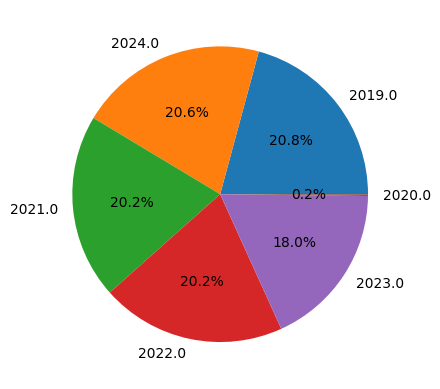

In [ ]:
graduateyear_column = "graduate_year"

print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')

# Educational Background
What experiences with programming do these students have? 

## STEM Courses

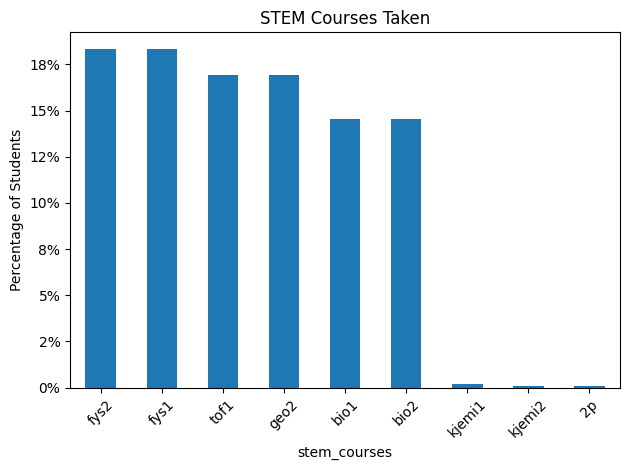

In [ ]:
plot_distribution(df, 'stem_courses', title='STEM Courses Taken')

## Elective Programming Courses

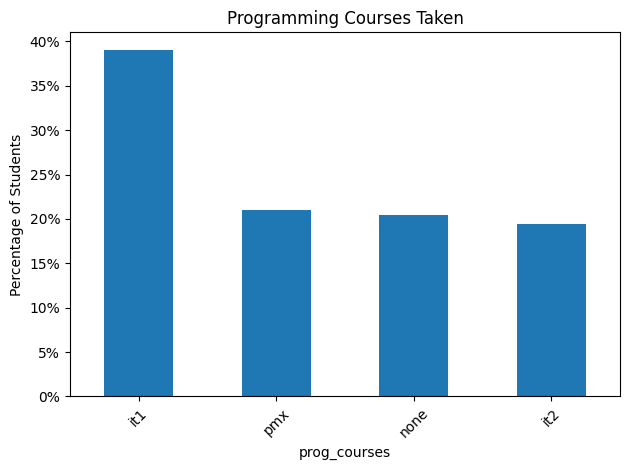

In [ ]:
plot_distribution(df, 'prog_courses', title='Programming Courses Taken')

## Math Courses

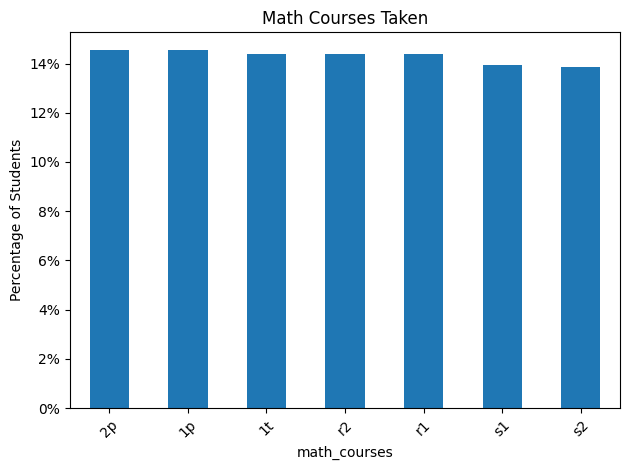

In [ ]:
plot_distribution(df, 'math_courses', title='Math Courses Taken')

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report such experience.

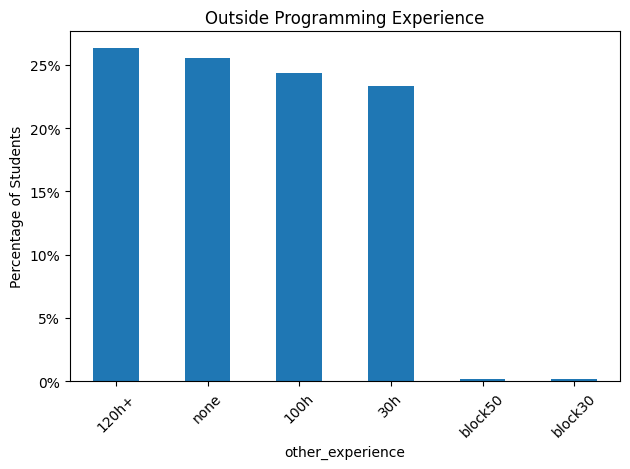

In [ ]:
plot_distribution(df, 'other_experience', title='Outside Programming Experience')

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [ ]:
# Configurations
bins = 20
max_points = 78 # i.e. range
edgecolor = 'black'
alpha = 0.5

In [ ]:
# Pseudo median --- Better average for non-normal distributions
def hodgesLehmannEstimator(x):
    x = x.to_numpy()
    n = len(x)
    hl = np.zeros(n*(n + 1)//2)
    idx = 0
    for i in range(n):
        for j in range(i+1):
            hl[idx] = (x[i] + x[j])/2
            idx += 1
    return np.median(hl)

## Main Result
A histogram of the total score of the students. The maximum score has been converted to a scale from 0 to 100, from the original 78 point max.

Median: 54.5
Standard deviation: 6.321


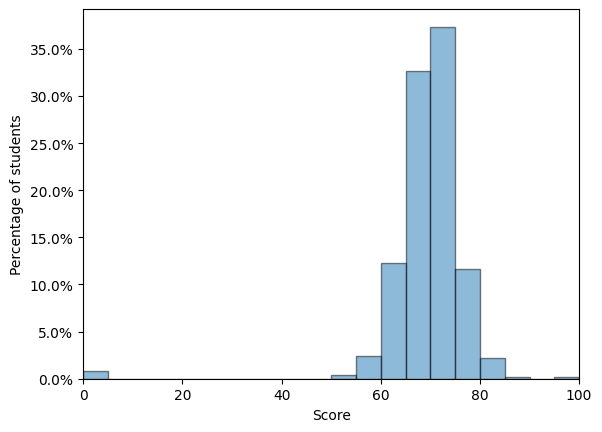

In [ ]:
x = df['Total']

# Convert scores to percentages relative to the max_points
x_percent = (x / max_points) * 100
x_label = 'Percentage of Maximum Score'

# Calculate mean and standard deviation
median = hodgesLehmannEstimator(df['Total'])
sd = df['Total'].std()
print(f'Median: {round(median, 3)}')
print(f'Standard deviation: {round(sd, 3)}')

# Plot the histogram
plt.hist(x_percent, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, 
         weights=np.ones(len(x)) / len(x), range=[0, 100])

# Set '%' formatter for both x and y axes
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=100, symbol=''))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add x and y axis labels
plt.xlabel('Score')  # Label for the x-axis
plt.ylabel('Percentage of students')  # Label for the y-axis

# Adjust margins and display the plot
plt.margins(x=0.0001)
fig = plt.gcf()
plt.show()

# Save the figure
fig.savefig('plots/allHist_percentage.png', dpi=300, bbox_inches='tight')

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

In [ ]:
def plot_likert_distribution(df, column_name, title="Likert Scale Distribution"):
    """
    Maps numeric Likert scale values to their text descriptors and plots a bar chart showing percentages.
    """
    # Mapping from keys to descriptors
    likert_map = {
        -2: "Very easy",
        -1: "Easy",
         0: "Neutral",
         1: "Difficult",
         2: "Very difficult"
    }

    # Convert column to numeric if needed
    data = pd.to_numeric(df[column_name], errors='coerce')

    # Map numeric values to text
    labels = data.map(likert_map)

    # Define desired order
    label_order = ["Very easy", "Easy", "Neutral", "Difficult", "Very difficult"]

    # Count and calculate percentages
    counts = labels.value_counts(normalize=True).reindex(label_order, fill_value=0)

    plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=100, symbol=''))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    # Plot
    counts.plot(kind='bar', color='cornflowerblue')
    plt.ylabel("Percentage of students")
    plt.title(title)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

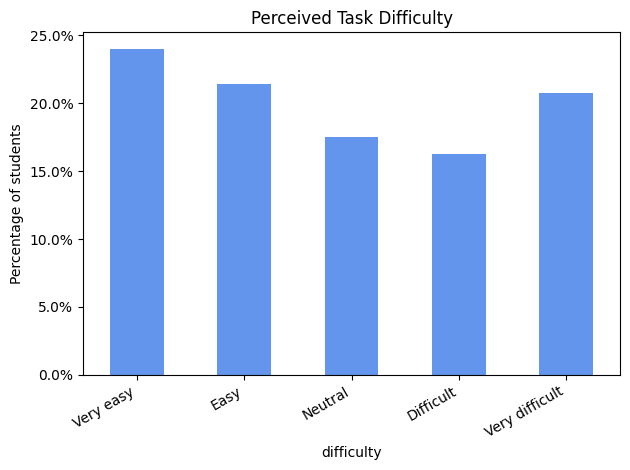

In [ ]:
plot_likert_distribution(df, 'difficulty', title='Perceived Task Difficulty')

# Prior Programming Experience in Secondary School

In [ ]:
# Significance test
def significane(group1, group2):
    # Perform Mann-Whitney U Test
    stat, p_value = stats.ranksums(group1, group2)
    
    # Print the test statistic and p-value
    print(f"Wilcox Rank-sum test: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation of p-value
    a = 0.05
    if p_value < a:
        print("Reject the null hypothesis: There is a significant difference between the two groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

In [ ]:
def compare_distributions(x, y, x_label, y_label, save_figure_name=''):
    n = len(x)
    average = hodgesLehmannEstimator(x)
    sd = x.std()
    print(f'N students in {x_label}: {n}')
    print(f'Average score of {x_label}: {round(average, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()

    n = len(y)
    mean = hodgesLehmannEstimator(y)
    sd = y.std()
    print(f'N students in {y_label}: {n}')
    print(f'Average score of {y_label}: {round(average, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, max_points])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, max_points])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))

    # Add x and y axis labels
    plt.xlabel('Score')  # Label for the x-axis
    #plt.ylabel('Percentage of students')  # Label for the y-axis
    
    plt.margins(x=0.0001)
    plt.legend(loc='upper right')
    fig = plt.gcf()
    plt.show()
    if save_figure_name != '':
        fig.savefig('plots/'+save_figure_name+'.png', dpi=300, bbox_inches='tight')

## Graduation Year

In [ ]:
# The yaer in which students entered university with programming experience from secondary school
initial_reformed_university_class_year = 2023

N students in 2023 and later: 195
Average score of 2023 and later: 54.5
Standard deviation of 2023 and later: 5.532

N students in Before 2023: 310
Average score of Before 2023: 54.5
Standard deviation of Before 2023: 6.046


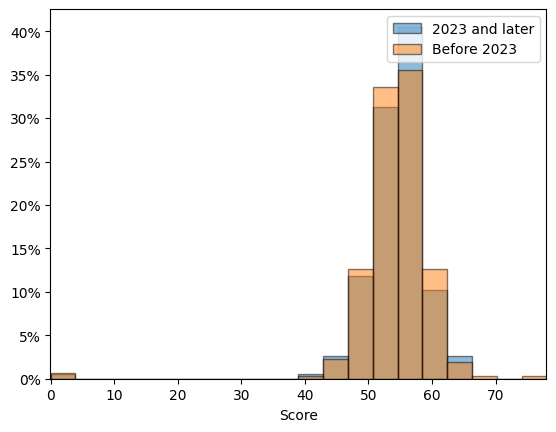

Wilcox Rank-sum test: 0.696501408882741
P-value: 0.48611487526357544
Fail to reject the null hypothesis: There is no significant difference between the two groups.


In [ ]:
years = df['graduate_year']

# Select groups based on year
x = df[years >= initial_reformed_university_class_year]['Total'].dropna()
y = df[years < initial_reformed_university_class_year]['Total'].dropna()

x_label = f'{initial_reformed_university_class_year} and later'
y_label = f'Before {initial_reformed_university_class_year}'

compare_distributions(x, y, x_label, y_label, 'graduateYearHist')
significane(x, y)

### Course combinations
Here we show the average score of all student groups based on course selection, i.e. mathematics, STEM and programming courses they completed in secondary school.

In [ ]:
# Expand each of the three course columns into sets
def expand_course_column(df, col):
    return df[col].fillna('').apply(lambda x: set(x.split(',')) if x else set())

df['math_courses_set'] = expand_course_column(df, 'math_courses')
df['stem_courses_set'] = expand_course_column(df, 'stem_courses')
df['prog_courses_set'] = expand_course_column(df, 'prog_courses')

# Get all unique course values across the dataset
unique_math = sorted({course for courses in df['math_courses_set'] for course in courses})
unique_stem = sorted({course for courses in df['stem_courses_set'] for course in courses})
unique_prog = sorted({course for courses in df['prog_courses_set'] for course in courses})

# Store results
results = []

# Iterate over all possible combinations
for math, stem, prog in product(unique_math, unique_stem, unique_prog):
    # Filter rows where student has all three course values
    mask = df['math_courses_set'].apply(lambda x: math in x) & \
           df['stem_courses_set'].apply(lambda x: stem in x) & \
           df['prog_courses_set'].apply(lambda x: prog in x)
    
    subset = df[mask]['Total'].dropna()
    
    if len(subset) >= 30:
        avg = hodgesLehmannEstimator(subset)
        results.append({
            'math_course': math,
            'stem_course': stem,
            'prog_course': prog,
            'n': len(subset),
            'average': avg
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='average', ascending=False)
display(results_df)

,math_course,stem_course,prog_course,n,average
0,1P,geo2,IT1,32,54.5
1,1P,tof1,IT1,32,54.5
2,2P,geo2,IT1,32,54.5
3,2P,tof1,IT1,32,54.5
4,S1,geo2,IT1,30,54.5
5,S1,tof1,IT1,30,54.5
6,S2,geo2,IT1,30,54.5
7,S2,tof1,IT1,30,54.5


# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [ ]:
def correctnes_rate(columns, topic, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{topic:15s} {correct_answer_rate*100:3.2f} %')

In [ ]:
# Expressions
expression_tasks = []
for i in range(1, 7):
    expression_tasks.append(f'expressions{i}')

# Variables
variable_tasks = []
for i in range(1, 6):
    variable_tasks.append(f'variables{i}a')
    variable_tasks.append(f'variables{i}b')
    if i > 3:
        variable_tasks.append(f'variables{i}c')
        
# Booleans
alphabet = 'abcdefg'
boolean_tasks = []
for i in range(1, 6):
    for j, letter in enumerate(alphabet):
        boolean_tasks.append(f'bool{i}{letter}')
        if i == 1 and j == 3:
            break
        if i == 3 and j == 3:
            break
        if i == 4 and j == 4:
            break
        if i == 5 and j == 4:
            break
boolean_tasks.append('bool6')

# Lists
list_tasks = []
for i in range(1, 7):
    if i < 5:
        list_tasks.append(f'lists{i}')
    else:
        list_tasks.append(f'lists{i}a')
        list_tasks.append(f'lists{i}b')


# Conditionals
conditional_tasks = []
for i in range(1, 6):
    conditional_tasks.append(f'conditionals{i}')

# Loops
loop_tasks = []
for i in range(1, 12):
    loop_tasks.append(f'loops{i}')

# Functions
function_tasks = []
for i in range(1, 6):
    function_tasks.append(f'functions{i}')
function_tasks.append('functions6a')
function_tasks.append('functions6b')
function_tasks.append('functions7a')
function_tasks.append('functions7b')
function_tasks.append('functions7c')

all_tasks = expression_tasks + variable_tasks + boolean_tasks + list_tasks + conditional_tasks + loop_tasks + function_tasks
#print(all_tasks)
print(f'{len(all_tasks)} tasks')

78 tasks


In [ ]:
print("The students have the following average correctness rate for each programming topic:")
correctnes_rate(expression_tasks, "Expressions")
correctnes_rate(variable_tasks, "Variables")
correctnes_rate(boolean_tasks, "Booleans")
correctnes_rate(list_tasks, "Lists")
correctnes_rate(conditional_tasks, "Conditionals")
correctnes_rate(loop_tasks, "Loops")
correctnes_rate(function_tasks, "Functions")

The students have the following average correctness rate for each programming topic:
Expressions     70.03 %
Variables       68.81 %
Booleans        69.09 %
Lists           69.37 %
Conditionals    68.74 %
Loops           70.34 %
Functions       70.55 %


# Tasks

In [ ]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct, incorrect and "I don't know" responses.
    Print the top n most common answers.
    '''
    task_point_column = task_column + "_points"

    if verbose_correct_answers:
        correct_count = df[task_point_column].eq(1).sum()
        incorrect_count = df[task_point_column].eq(0).sum()
        idk_count = df[task_column].eq("-").sum()

        print(f"Correct     : {correct_count}")
        print(f"Incorrect   : {incorrect_count}")
        print(f"I don't know: {idk_count}")
        print()

    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts().head(n_answers).to_string(header=False))
    except:
        print(df[task_column].value_counts().to_string(header=False))

### Expressions 1
What does this program print?
```python
print(2 + 3)
```

In [ ]:
print_task_result("expressions1", df)

Correct     : 371
Incorrect   : 135
I don't know: 4

Top 5 most common answers:
5     371
7      25
1      24
99     23
0      22


### Expressions 2
What does this program print?
```python
a = 12
result = a + a

print(result)
```

In [ ]:
print_task_result("expressions2", df)

Correct     : 346
Incorrect   : 160
I don't know: 4

Top 5 most common answers:
24    346
42     32
1      30
0      28
7      28


### Expressions 3
What does this program print?
```python
a = 6
b = 8
c = a + b
d = c + a

print(d)
```

In [ ]:
print_task_result("expressions3", df)

Correct     : 340
Incorrect   : 166
I don't know: 4

Top 5 most common answers:
20    340
13     32
99     30
0      28
1      26


### Expressions 4
What does this program print?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [ ]:
print_task_result("expressions4", df)

Correct     : 363
Incorrect   : 143
I don't know: 4

Top 5 most common answers:
2     363
7      30
42     25
1      25
99     23


### Expressions 5
What does this program print?
```python
a = '123'
result = a + a

print(result)
```

In [ ]:
print_task_result("expressions5", df)

Correct     : 352
Incorrect   : 154
I don't know: 4

Top 5 most common answers:
123123    352
0          30
13         27
1          25
7          25


### Expressions 6
What does this program print?
```python
n = '1'
n = n + '1'
n = n + '1'

print(n)
```

In [ ]:
print_task_result("expressions6", df)

Correct     : 354
Incorrect   : 152
I don't know: 4

Top 5 most common answers:
111    354
99      29
1       29
13      26
42      23


### Variables 1
What are the values of `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [ ]:
print("### Value of a ###")
print_task_result("variables1a", df)
print("\n### Value of b ###")
print_task_result("variables1b", df)

### Value of a ###
Correct     : 358
Incorrect   : 148
I don't know: 4

Top 5 most common answers:
20    358
7      29
0      26
42     24
99     23

### Value of b ###
Correct     : 345
Incorrect   : 161
I don't know: 4

Top 5 most common answers:
20    345
99     33
42     31
0      30
13     24


### Variables 2
What are the values of `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [ ]:
print("### Value of a ###")
print_task_result("variables2a", df)
print("\n### Value of b ###")
print_task_result("variables2b", df)

### Value of a ###
Correct     : 356
Incorrect   : 150
I don't know: 4

Top 5 most common answers:
10    356
1      34
0      28
13     25
42     23

### Value of b ###
Correct     : 352
Incorrect   : 154
I don't know: 4

Top 5 most common answers:
10    352
42     36
1      25
7      24
13     24


### Variables 3
What are the values of `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [ ]:
print("### Value of a ###")
print_task_result("variables3a", df)
print("\n### Value of b ###")
print_task_result("variables3b", df)

### Value of a ###
Correct     : 331
Incorrect   : 175
I don't know: 4

Top 5 most common answers:
20    331
7      37
99     30
1      30
42     28

### Value of b ###
Correct     : 342
Incorrect   : 164
I don't know: 4

Top 5 most common answers:
20    342
99     34
7      31
0      30
42     25


### Variables 4
What are the values of `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [ ]:
print("### Value of a ###")
print_task_result("variables4a", df)
print("\n### Value of b ###")
print_task_result("variables4b", df)
print("\n### Value of c ###")
print_task_result("variables4c", df)

### Value of a ###
Correct     : 335
Incorrect   : 171
I don't know: 4

Top 5 most common answers:
20    335
13     33
0      29
7      27
99     27

### Value of b ###
Correct     : 369
Incorrect   : 137
I don't know: 4

Top 5 most common answers:
30    369
42     31
0      27
7      25
99     21

### Value of c ###
Correct     : 359
Incorrect   : 147
I don't know: 4

Top 5 most common answers:
30    359
99     30
0      26
42     26
13     21


### Variables 5
What are the values of `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [ ]:
print("### Value of a ###")
print_task_result("variables5a", df)
print("\n### Value of b ###")
print_task_result("variables5b", df)
print("\n### Value of c ###")
print_task_result("variables5c", df)

### Value of a ###
Correct     : 340
Incorrect   : 166
I don't know: 4

Top 5 most common answers:
30    340
0      30
7      30
99     27
1      27

### Value of b ###
Correct     : 337
Incorrect   : 169
I don't know: 4

Top 5 most common answers:
30    337
42     40
13     31
99     27
7      26

### Value of c ###
Correct     : 354
Incorrect   : 152
I don't know: 4

Top 5 most common answers:
30    354
13     36
0      27
1      25
7      22


### Booleans 1
What are the boolean values of the following expressions?

In [ ]:
print("### 2 > 7 ###")
print_task_result("bool1a", df, n_answers=3)
print()
print("### (10 + 3) >= 13 ###")
print_task_result("bool1b", df, n_answers=3)
print()
print("### (10 * 2) < 9 ###")
print_task_result("bool1c", df, n_answers=3)
print()
print("### (1 + 3) < (2 * 3) ###")
print_task_result("bool1d", df, n_answers=3)

### 2 > 7 ###
Correct     : 363
Incorrect   : 143
I don't know: 4

Top 3 most common answers:
False    361
true     139
-          4

### (10 + 3) >= 13 ###
Correct     : 377
Incorrect   : 129
I don't know: 4

Top 3 most common answers:
True     376
false    124
-          4

### (10 * 2) < 9 ###
Correct     : 329
Incorrect   : 177
I don't know: 4

Top 3 most common answers:
False    327
true     173
-          4

### (1 + 3) < (2 * 3) ###
Correct     : 347
Incorrect   : 159
I don't know: 4

Top 3 most common answers:
True     345
false    155
-          4


### Booleans 2
What are the boolean values of the following expressions?

In [ ]:
print("### 100 != 100 ###")
print_task_result("bool1a", df, n_answers=3)
print()
print("### (3 < 7) and (7 < 9) ###")
print_task_result("bool2b", df, n_answers=3)
print()
print("### (5 < 7) and (4 > 5) ###")
print_task_result("bool2c", df, n_answers=3)
print()
print("### (3 < 7) or (7 < 9) ###")
print_task_result("bool2d", df, n_answers=3)
print()
print("### (5 < 7) or (4 > 5) ###")
print_task_result("bool2e", df, n_answers=3)
print()
print("### not (100 > 100) ###")
print_task_result("bool2f", df, n_answers=3)
print()
print("### not (100 != 100) ###")
print_task_result("bool2g", df, n_answers=3)

### 100 != 100 ###
Correct     : 363
Incorrect   : 143
I don't know: 4

Top 3 most common answers:
False    361
true     139
-          4

### (3 < 7) and (7 < 9) ###
Correct     : 361
Incorrect   : 145
I don't know: 4

Top 3 most common answers:
True     359
false    141
-          4

### (5 < 7) and (4 > 5) ###
Correct     : 360
Incorrect   : 146
I don't know: 4

Top 3 most common answers:
False    358
true     142
-          4

### (3 < 7) or (7 < 9) ###
Correct     : 356
Incorrect   : 150
I don't know: 4

Top 3 most common answers:
True     355
false    145
-          4

### (5 < 7) or (4 > 5) ###
Correct     : 330
Incorrect   : 176
I don't know: 4

Top 3 most common answers:
True     328
false    172
-          4

### not (100 > 100) ###
Correct     : 339
Incorrect   : 167
I don't know: 4

Top 3 most common answers:
True     338
false    162
-          4

### not (100 != 100) ###
Correct     : 349
Incorrect   : 157
I don't know: 4

Top 3 most common answers:
True     347
false    

### Booleans 3
What are the boolean values of the following expressions?

In [ ]:
print("### True or False ###")
print_task_result("bool3a", df, n_answers=3)
print()
print("### True and False ###")
print_task_result("bool3b", df, n_answers=3)
print()
print("### True == True ###")
print_task_result("bool3c", df, n_answers=3)
print()
print("### not (True != True) ###")
print_task_result("bool3d", df, n_answers=3)


### True or False ###
Correct     : 347
Incorrect   : 159
I don't know: 4

Top 3 most common answers:
True     346
false    154
-          4

### True and False ###
Correct     : 340
Incorrect   : 166
I don't know: 4

Top 3 most common answers:
False    338
true     162
-          4

### True == True ###
Correct     : 359
Incorrect   : 147
I don't know: 4

Top 3 most common answers:
True     357
false    143
-          4

### not (True != True) ###
Correct     : 358
Incorrect   : 148
I don't know: 4

Top 3 most common answers:
True     356
false    144
-          4


### Booleans 4
What are the boolean values of the following expressions?
```python
n = 5
```

In [ ]:
print("### n < 10 ###")
print_task_result("bool4a", df, n_answers=3)
print()
print("### 100 == n ###")
print_task_result("bool4b", df, n_answers=3)
print()
print("### (n < 7) and (4 > n) ###")
print_task_result("bool4c", df, n_answers=3)
print()
print("### n <= 5 ###")
print_task_result("bool4d", df, n_answers=3)
print()
print("### not (n < 10) ###")
print_task_result("bool4e", df, n_answers=3)

### n < 10 ###
Correct     : 349
Incorrect   : 157
I don't know: 4

Top 3 most common answers:
True     347
false    153
-          4

### 100 == n ###
Correct     : 340
Incorrect   : 166
I don't know: 4

Top 3 most common answers:
False    338
true     162
-          4

### (n < 7) and (4 > n) ###
Correct     : 349
Incorrect   : 157
I don't know: 4

Top 3 most common answers:
False    348
true     152
-          4

### n <= 5 ###
Correct     : 327
Incorrect   : 179
I don't know: 4

Top 3 most common answers:
True     325
false    175
-          4

### not (n < 10) ###
Correct     : 358
Incorrect   : 148
I don't know: 4

Top 3 most common answers:
False    357
true     143
-          4


### Booleans 5
What are the boolean values of the following expressions?
```python
a = 2
b = 3
c = 5
```

In [ ]:
print("### (a + b) == c ###")
print_task_result("bool5a", df, n_answers=3)
print()
print("### ((a * 2) < c) and ((b + a) > 5) ###")
print_task_result("bool5b", df, n_answers=3)
print()
print("### not ((c - a) < b) ###")
print_task_result("bool5c", df, n_answers=3)
print()
print("### ((a + b) == c) or ((b * 2) == c) ###")
print_task_result("bool5d", df, n_answers=3)
print()
print("### ((a + b) < c) and not ((b - a) < 2) ###")
print_task_result("bool5e", df, n_answers=3)

### (a + b) == c ###
Correct     : 346
Incorrect   : 160
I don't know: 4

Top 3 most common answers:
True     344
false    156
-          4

### ((a * 2) < c) and ((b + a) > 5) ###
Correct     : 338
Incorrect   : 168
I don't know: 4

Top 3 most common answers:
False    337
true     163
-          4

### not ((c - a) < b) ###
Correct     : 357
Incorrect   : 149
I don't know: 4

Top 3 most common answers:
True     355
false    145
-          4

### ((a + b) == c) or ((b * 2) == c) ###
Correct     : 345
Incorrect   : 161
I don't know: 4

Top 3 most common answers:
True     344
false    156
-          4

### ((a + b) < c) and not ((b - a) < 2) ###
Correct     : 351
Incorrect   : 155
I don't know: 4

Top 3 most common answers:
False    350
true     150
-          4


### Booleans 6
Assume that `a`, `b` and `c` are variables of type `int`. Consider the following expressions:
```python
I (a == b) and (a == c) and (b == c)
II (a == b) or (a == c) or (b == c)
III ((a - b) * (a - c) * (b - c)) == 0
```
Which of these expressions are always true if TWO of `a`. `b` and `c` equal?

In [ ]:
print_task_result("bool6", df)

Correct     : 353
Incorrect   : 153
I don't know: 3

Top 5 most common answers:
iiandiii     353
something     16
i             13
1             11
0             10


### Lists 1
What does this program print?
```python
ls = [10, 20, 30]
print(ls[1])
```

In [ ]:
print_task_result("lists1", df)

Correct     : 368
Incorrect   : 138
I don't know: 4

Top 5 most common answers:
20    368
1      26
7      26
99     23
42     20


### Lists 2
What does this program print?
```python
a = [2, 4, 7, 9]
print(len(a))
```

In [ ]:
print_task_result("lists2", df)

Correct     : 355
Incorrect   : 151
I don't know: 4

Top 5 most common answers:
4     355
1      32
13     30
0      28
42     24


### Lists 3
What does this program print?
```python
a = [10, 20, 30]
a[1] = 80

print(a[1])
```

In [ ]:
print_task_result("lists3", df)

Correct     : 355
Incorrect   : 151
I don't know: 4

Top 5 most common answers:
80    355
1      30
42     28
99     24
0      24


### Lists 4
Which values does list `a`` have after line 4?
```python
a = [10, 20, 30]
a[1] = a[1] + 5

print(a[1])
```

In [ ]:
print_task_result("lists4", df)

Correct     : 337
Incorrect   : 169
I don't know: 4

Top 5 most common answers:
25    337
0      37
1      28
7      27
13     26


### Lists 5
What does this program print?
```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]
```

In [ ]:
print("### List a ###")
print_task_result("lists5a", df)
print("\n### List b ###")
print_task_result("lists5b", df)

### List a ###
Correct     : 345
Incorrect   : 161
I don't know: 4

Top 5 most common answers:
10,20,30    345
5,5,5        57
0,0,0        53
1,1,1        47
-             4

### List b ###
Correct     : 351
Incorrect   : 155
I don't know: 4

Top 5 most common answers:
5,35,25    351
0,0,0       58
5,5,5       52
1,1,1       41
-            4


### Lists 5
Which values does lists `a` and `b` have after line 6?
```python
a = [10, 20, 30]
b = [5, 15, 25]

a[1] = b[2] - 5
b[0] = a[2] - 10
a[2] = a[1] + b[1]
```

In [ ]:
print("### List a ###")
print_task_result("lists6a", df)
print("\n### List b ###")
print_task_result("lists6b", df)

### List a ###
Correct     : 349
Incorrect   : 157
I don't know: 4

Top 5 most common answers:
10,20,35    349
5,5,5        62
1,1,1        48
0,0,0        43
-             4

### List b ###
Correct     : 348
Incorrect   : 158
I don't know: 4

Top 5 most common answers:
20,15,25    348
1,1,1        52
5,5,5        51
0,0,0        51
-             4


### Expressions 2
What does this program print?
```python
a = 12
result = a + a

print(result)
```

In [ ]:
print_task_result("expressions1", df)

Correct     : 371
Incorrect   : 135
I don't know: 4

Top 5 most common answers:
5     371
7      25
1      24
99     23
0      22


### Conditionals 1
What does this program print?
```python
if 2 > 7:
    print(1)
```

In [ ]:
print_task_result("conditionals1", df)

Correct     : 356
Incorrect   : 150
I don't know: 4

Top 5 most common answers:
nothing    356
42          14
False       11
iv          10
0           10


### Conditionals 2
What does this program print?
```python
if 10 < (2 * 3):
    print(1)
else:
    print(2)
```

In [ ]:
print_task_result("conditionals2", df)

Correct     : 335
Incorrect   : 171
I don't know: 4

Top 5 most common answers:
2     335
1      36
13     34
42     30
7      23


### Conditionals 3
What does this program print?
```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [ ]:
print_task_result("conditionals3", df)

Correct     : 348
Incorrect   : 158
I don't know: 4

Top 5 most common answers:
2     348
99     37
1      30
7      25
42     24


### Conditionals 4
What does this program print?
```python
a = 5
b = 3 
c = 9

if (a < b) and (a < c):
    num = 1
elif (b < a) and (b < c):
    num = 2
else:
    num = 3

print(num)
```

In [ ]:
print_task_result("conditionals4", df)

Correct     : 346
Incorrect   : 160
I don't know: 4

Top 5 most common answers:
2     346
42     36
1      30
99     24
13     24


### Conditionals 5
Which of the following alternatives for <code>MISSING_CODE1</code> and <code>MISSING_CODE2</code> will print <code>2</code> and <code>3</code>?
```python
x = False
y = True
z = False

if MISSING_CODE1:
    print(1)
else:
    print(2)
if MISSING_CODE2:
    print(3)
else:
    print(4)
```
<b>I.</b><br><code>MISSING_CODE1</code>: <code>x or y</code><br><code>MISSING_CODE2</code>: <code>y and not x</code><br><br><b>II.</b><br><code>MISSING_CODE1</code>: <code>not y</code><br><code>MISSING_CODE2</code>: <code>x or y</code><br><br><b>III.</b><br><code>MISSING_CODE1</code>: <code>x and y</code><br><code>MISSING_CODE2</code>: <code>y and z</code><br><br><b>IV.</b><br><code>MISSING_CODE1</code>: <code>x and not y</code><br><code>MISSING_CODE2</code>: <code>not z and x</code>",


In [ ]:
print_task_result("conditionals5", df)

Correct     : 354
Incorrect   : 152
I don't know: 3

Top 5 most common answers:
ii       354
i         25
none      25
maybe     23
iv        21


### Loops 1
What does this program print?
```python
n = 0
while n < 10:
    n = n + 1
    
print(n) 
```

In [ ]:
print_task_result("loops1", df)

Correct     : 348
Incorrect   : 158
I don't know: 4

Top 5 most common answers:
10    348
13     31
99     28
0      26
7      24


### Loops 2
What does this program print?
```python
n = 100
while n < 10:
    n = n + 2
    
print(n) 
```

In [ ]:
print_task_result("loops2", df)

Correct     : 357
Incorrect   : 149
I don't know: 4

Top 5 most common answers:
100    357
13      32
7       27
1       23
99      23


### Loops 3
Which of the following statements best describes the execution of the while loop?
```python
i = 1
j = 0
while j < 10:
    print('Book', i)
    i = i + 1
```
<strong>I) </strong>When j is less than 10, print \"Book i\", e.g.,<br></br><code>Book 1</code><br></br><code>Book 2</code><br></br>...<br></br><code>Book 9</code><br></br><strong>II) </strong>When j is less than 10, print \"Book j\", e.g.,<br></br><code>Book 0</code><br></br><code>Book 1</code><br></br>...<br></br><code>Book 9</code><br></br><strong>III) </strong>j is always equal to 0, which is less than 10; so print \"Book 0\" an infinite number of times, e.g.,<br></br><code>Book 0</code><br></br><code>Book 0</code><br></br><code>...</code><br></br><strong>IV) </strong>j is always equal to 0, which is less than 10; so print \"Book i\" an infinite number of times, e.g.<br></br><code>Book 1</code><br></br><code>Book 2</code><br></br>...<br></br><strong>V) </strong>j is equal to 0, which is less than 10; so print<br></br><code>Book 1</code>


In [ ]:
print_task_result("loops3", df)

Correct     : 359
Incorrect   : 147
I don't know: 3

Top 5 most common answers:
iv           359
something     24
none          22
v             22
maybe         20


### Loops 4
What does this program print?
```python
n = 5
while n > 0:
    print(n)
    n = n - 2
```

In [ ]:
print_task_result("loops4", df)

Correct     : 359
Incorrect   : 147
I don't know: 4

Top 5 most common answers:
5 3 1      359
2 3 4       55
5 6         48
1 1 1 1     40
-            4


### Loops 5
What does this program print?
```python
n = 6
while n > 0:
    print(n)
    if n > 3:
        n = n - 2
    else:
        n = n - 1
```

In [ ]:
print_task_result("loops5", df)

Correct     : 359
Incorrect   : 147
I don't know: 4

Top 5 most common answers:
6 4 2 1    359
1 1 1 1     49
5 6         49
2 3 4       45
-            4


### Loops 6
In which of the following cases is it NOT appropriate to use a for loop?
- I. When I want to print all the values in a list at the end of the program.
- II. When I want to repeat something a certain number of times.
- III. When I want to count over a range of numbers.
- IV. When I want to perform the same operation on different elements of a list.
- V. When I want to iterate until a certain condition is met.

In [ ]:
print_task_result("loops6", df)

Correct     : 349
Incorrect   : 157
I don't know: 4

Top 5 most common answers:
v            349
iv            28
iii           28
ii            27
something     24


### Loops 7
What does this program print?
```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + 1

print(n)
```

In [ ]:
print_task_result("loops7", df)

Correct     : 372
Incorrect   : 134
I don't know: 4

Top 5 most common answers:
3     372
99     26
0      23
42     23
7      22


### Loops 8
What does this program print?
```python
ls = [1, 2, 3]
for x in ls:
    print(1)
print(2)
```

In [ ]:
print_task_result("loops8", df)

Correct     : 341
Incorrect   : 165
I don't know: 4

Top 5 most common answers:
1 1 1 2    341
5 6         58
2 3 4       54
1 1 1 1     49
-            4


### Loops 9
What does this program print?
```python
n = 0
ls = [6, 3, 1, 0, 2]
for e in ls:
    n = n + e

print(n)
```

In [ ]:
print_task_result("loops9", df)

Correct     : 363
Incorrect   : 143
I don't know: 4

Top 5 most common answers:
12    363
42     29
13     29
0      27
1      22


### Loops 10
What does this program print?
```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [ ]:
print_task_result("loops10", df)

Correct     : 374
Incorrect   : 132
I don't know: 4

Top 5 most common answers:
9     374
99     29
1      26
42     21
7      19


### Loops 11
What does this program print?
```python
n = 0
ls = [1, 2, 3]
for x in ls:
    for y in ls:
        n = n + 1
print(n)
```

In [ ]:
print_task_result("loops11", df)

Correct     : 334
Incorrect   : 172
I don't know: 4

Top 5 most common answers:
9     334
99     34
1      32
7      31
13     28


### Functions 1
What does this program print?
```python
def f(x):
    x = x + 2
    return x - 1

print(f(6))
```

In [ ]:
print_task_result("functions1", df)

Correct     : 349
Incorrect   : 157
I don't know: 4

Top 5 most common answers:
7     349
0      42
99     35
13     27
42     25


### Functions 2
What does this program print?
```python
def f():
    print(1)
    print(2)

f()
f()
```

In [ ]:
print_task_result("functions2", df)

Correct     : 335
Incorrect   : 171
I don't know: 4

Top 5 most common answers:
1 2 1 2    335
5 6         63
1 1 1 1     53
2 3 4       51
-            4


### Functions 3
Which of the following statements best describes the execution of the function call <code>add(8, 5, 12)</code>
```python
def add(a, b, c):
    max = 0
    if (a < b) and (a < c):
        max = b + c
        return max
    elif (b < a) and (b < c):
        max = a + c
        return max
    else:
        max = a + b
        return max
    print(max)

add(8, 5, 12)
```
- I. Value of max = 13
- II. "After printing the max sum, add will return the max
- III. Nothing will ever be returned from this function
- IV. Nothing will ever be printed from this function
- V. An error will be generated for attempting to print after returning max

In [ ]:
print_task_result("functions3", df)

Correct     : 357
Incorrect   : 149
I don't know: 3

Top 5 most common answers:
iv     357
iii     26
ii      21
i       20
v       20


### Functions 4
Consider the following function, <b>between</b>, which is intended to return true if <code>x</code> is between <code>lower</code> and <code>upper</code>, and false otherwise.<br></br>Which of the following can be used to replace <code># Missing code</code> so that <b>between</b> will work as intended?
```python
def between(x, lower, upper):
    # Missing code
```

In [ ]:
print_task_result("functions4", df)

Correct     : 365
Incorrect   : 141
I don't know: 4

Top 5 most common answers:
iii          365
v             23
none          23
ii            21
something     21


### Functions 5
Which of the following can be used to replace the body of the function <code>calculate</code> so that the modified version of <code>calculate</code> will return the same result as the original version for all x?
```python
def calculate(x):
    x = x + x
    x = x + x
    x = x + x
    return x
```
- I. return 3 + x
- II. return 3 * x
- III. return 4 + x
- IV. return 4 * x
- V. return 8 * x

In [ ]:
print_task_result("functions5", df)

Correct     : 376
Incorrect   : 130
I don't know: 4

Top 5 most common answers:
v        376
iv        22
maybe     21
iii       21
none      20


### Functions 6
What does this program print?
```python
def f(x):
    return 2 * x

x = 5
a = f(x)
b = f(x)

print(a)
print(b)
```

In [ ]:
print("#### a ###")
print_task_result("functions6a", df)
print("\n#### b ###")
print_task_result("functions6b", df)

#### a ###
Correct     : 360
Incorrect   : 146
I don't know: 4

Top 5 most common answers:
10    360
0      35
13     28
42     24
7      21

#### b ###
Correct     : 351
Incorrect   : 155
I don't know: 4

Top 5 most common answers:
10    351
13     31
7      28
42     28
99     27


### Functions 7a
What does this program print?
```python
def f(x):
    x = x + 2
    return x - 1

def g(x):
    x = f(x) + 3
    return x

print(f(2) + f(3))
```

In [ ]:
print_task_result("functions7a", df)

Correct     : 358
Incorrect   : 148
I don't know: 4

Top 5 most common answers:
7     358
42     39
0      29
1      28
99     25


### Functions 7b
What does this program print?
```python
def f(x):
    x = x + 2
    return x - 1

def g(x):
    x = f(x) + 3
    return x

print(g(3))
```

In [ ]:
print_task_result("functions7b", df)

Correct     : 363
Incorrect   : 143
I don't know: 4

Top 5 most common answers:
7     363
13     33
1      28
0      28
99     26


### Functions 7c
What does this program print?
```python
def f(x):
    x = x + 2
    return x - 1

def g(x):
    x = f(x) + 3
    return x

print(f(g(5)))
```

In [ ]:
print_task_result("functions7c", df)

Correct     : 356
Incorrect   : 150
I don't know: 4

Top 5 most common answers:
10    356
13     28
0      27
42     26
1      24


# Student Comments
At the end of the test students were prompted with the following text:
```
Do you have any comments about the test?
If you thought this was hard, have no worries :) You will learn all this in the coming semester.
```

In [ ]:
for comment in df['comments']:
    if comment == "-":
        continue
    print(comment)

Test al correct
Interesting.
Interesting.
Good test.
Good test.
Too hard.
Too hard.
Too hard.
nan
Interesting.
Too hard.
Good test.
Good test.
Too hard.
Good test.
nan
Interesting.
nan
Good test.
Interesting.
Too hard.
Too hard.
Too hard.
Good test.
nan
Too hard.
Good test.
Good test.
nan
Good test.
Interesting.
Interesting.
Interesting.
Too hard.
Interesting.
Good test.
Good test.
Good test.
nan
Interesting.
nan
Interesting.
Interesting.
Interesting.
Too hard.
Interesting.
Interesting.
nan
nan
Too hard.
Interesting.
nan
nan
nan
Too hard.
Interesting.
Good test.
Good test.
Interesting.
Interesting.
nan
Too hard.
Good test.
Interesting.
Interesting.
Interesting.
Interesting.
Too hard.
nan
nan
Good test.
nan
nan
Good test.
nan
Good test.
Too hard.
nan
nan
Good test.
Too hard.
Interesting.
Interesting.
nan
nan
nan
Interesting.
nan
Good test.
nan
nan
Too hard.
nan
Good test.
Interesting.
Too hard.
nan
nan
Good test.
Interesting.
Good test.
nan
Good test.
Good test.
nan
nan
Interesting.
nan